In [82]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score


In [83]:
# Caricamento del dataset
file_path = 'data-istruzioni/Data.xlsx'
data = pd.read_excel(file_path)

# Rimozione colonne inutili ai fini computazionali
data_cleaned = data.drop(columns=['ID'])

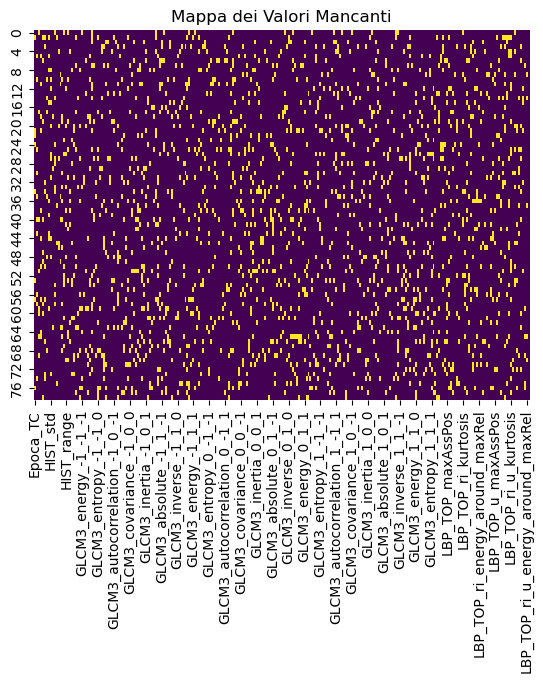

In [84]:
# Plot di una mappa per la visualizzazione dei dati mancanti nel dataset
sns.heatmap(data_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Mappa dei Valori Mancanti')
plt.show()

In [85]:
display(data_cleaned.head())
display(data_cleaned.describe())

,Epoca_TC,Area_grasso_periviscerale,Area_grasso_sottocutaneo,Istologia,GS_alla_diagnosi,TNM_alla_diagnosi,Eta_alla_RP,HIST_mean,HIST_std,HIST_skewness,...,LBP_TOP_ri_u_kurtosis,LBP_TOP_ri_u_energy,LBP_TOP_ri_u_entropy,LBP_TOP_ri_u_maxAssValue,LBP_TOP_ri_u_maxAssPos,LBP_TOP_ri_u_energy_around_maxAss,LBP_TOP_ri_u_range,LBP_TOP_ri_u_numMaxRel,LBP_TOP_ri_u_energy_around_maxRel,Recidiva/Non_Recidiva
0,0.0,305850.0,NaN,0.0,1.0,4.0,65.731507,923.939095,22.075926,0.148808,...,-1.157491,0.075455,NaN,0.150154,515.0,0.024376,3.0,3.0,0.066795,0
1,NaN,253373.0,112560.0,0.0,NaN,NaN,67.073973,NaN,20.810230,0.125743,...,NaN,0.064238,4.460785,0.140205,515.0,0.021180,3.0,3.0,0.053378,1
2,0.0,120088.0,126318.0,5.0,3.0,7.0,57.589041,933.389603,21.953912,-0.132466,...,-1.192144,0.058263,4.530830,0.126134,515.0,0.017368,3.0,3.0,0.044675,0
3,0.0,174566.0,135506.0,0.0,1.0,NaN,71.095890,932.342182,18.594080,0.090647,...,-1.168322,0.063187,4.474825,0.137912,515.0,NaN,3.0,3.0,0.052015,0
4,0.0,197914.0,217320.0,0.0,3.0,4.0,61.400000,927.333501,21.675176,0.091652,...,NaN,0.068131,NaN,0.147917,515.0,0.023504,3.0,3.0,0.057917,0


,Epoca_TC,Area_grasso_periviscerale,Area_grasso_sottocutaneo,Istologia,GS_alla_diagnosi,TNM_alla_diagnosi,Eta_alla_RP,HIST_mean,HIST_std,HIST_skewness,...,LBP_TOP_ri_u_kurtosis,LBP_TOP_ri_u_energy,LBP_TOP_ri_u_entropy,LBP_TOP_ri_u_maxAssValue,LBP_TOP_ri_u_maxAssPos,LBP_TOP_ri_u_energy_around_maxAss,LBP_TOP_ri_u_range,LBP_TOP_ri_u_numMaxRel,LBP_TOP_ri_u_energy_around_maxRel,Recidiva/Non_Recidiva
count,71.000000,69.000000,71.000000,69.000000,70.000000,70.000000,73.000000,70.000000,68.000000,76.000000,...,64.000000,76.000000,68.000000,71.000000,71.000000,69.000000,73.0,73.000000,74.000000,79.000000
mean,0.352113,212096.391304,154008.859155,0.608696,2.842857,6.371429,65.363633,909.097062,40.163830,-0.018062,...,-1.159249,0.063868,4.467829,0.137207,482.549296,0.020303,3.0,2.972603,0.051764,0.569620
std,0.481028,72162.493698,58792.313948,1.384976,1.235181,2.703575,6.150580,108.782869,91.295190,0.356017,...,0.018096,0.006233,0.074879,0.008603,96.075088,0.002686,0.0,0.234082,0.008881,0.498293
min,0.000000,66880.000000,21299.000000,0.000000,0.000000,0.000000,51.819178,279.399839,17.255164,-1.312199,...,-1.194679,0.048874,4.309003,0.112585,3.000000,0.013053,3.0,1.000000,0.016600,0.000000
25%,0.000000,156238.000000,114983.500000,0.000000,2.000000,4.000000,61.391781,926.906486,19.751901,-0.143185,...,-1.168432,0.059459,4.418581,0.132472,515.000000,0.018749,3.0,3.000000,0.046702,0.000000
50%,0.000000,205889.000000,149207.000000,0.000000,3.000000,7.000000,65.843836,930.023000,20.684062,0.018413,...,-1.162882,0.064349,4.463933,0.137751,515.000000,0.020700,3.0,3.000000,0.053087,1.000000
75%,1.000000,268697.000000,192459.500000,0.000000,4.000000,9.000000,70.230137,933.858061,21.630478,0.169329,...,-1.151012,0.068281,4.511836,0.143095,515.000000,0.022139,3.0,3.000000,0.057210,1.000000
max,1.000000,392008.000000,286767.000000,6.000000,5.000000,11.000000,76.649315,948.853185,486.666624,1.044334,...,-1.064864,0.075455,4.657847,0.150382,515.000000,0.024376,3.0,3.000000,0.066795,1.000000


In [86]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Columns: 250 entries, Epoca_TC to Recidiva/Non_Recidiva
dtypes: float64(249), int64(1)
memory usage: 154.4 KB


In [87]:
# Divisione del dataset in features e label
X = data_cleaned.drop('Recidiva/Non_Recidiva', axis = 1)
y = data_cleaned['Recidiva/Non_Recidiva']
# Divisione del dataset in set di training e set di test con una proporzione del 70%-30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


In [88]:
# Gestione valori mancanti sostituendo i valori NaN con la media
numerical_imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(numerical_imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(numerical_imputer.transform(X_test), columns=X_test.columns)

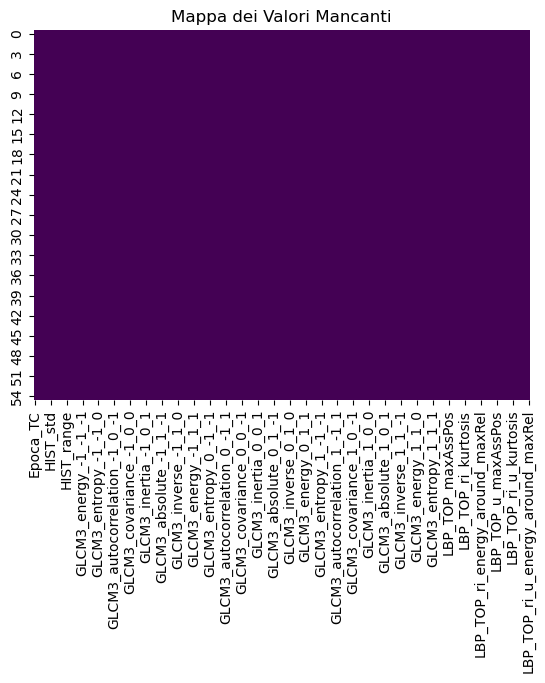

In [89]:
# Plot di una mappa per la visualizzazione dei dati mancanti nel set di training dopo la sostituzione dei valori nulli con la media
sns.heatmap(X_train.isnull(), cbar=False, cmap='viridis')
plt.title('Mappa dei Valori Mancanti')
plt.show()

In [90]:
# Creazione di una pipeline che fa lo scaling dei dati e applica un modello SVM con kernel RBF
svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling dei dati
    ('svc', SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))  # Modello SVC
])

In [91]:
# Addestramento sul set di training
svc_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(random_state=42))])

In [92]:
# Predizioni sul set di test
predictions = svc_pipeline.predict(X_test)

In [93]:
# Calcolo della matrice di confusione 
CM = confusion_matrix(y_test, predictions)
print("Matrice di Confusione:")
print(CM)

print("\nClassification Report:")
# Calcolo del report di classificazione
print(classification_report(y_test, predictions))

Matrice di Confusione:
[[ 2  7]
 [ 2 13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.22      0.31         9
           1       0.65      0.87      0.74        15

    accuracy                           0.62        24
   macro avg       0.57      0.54      0.53        24
weighted avg       0.59      0.62      0.58        24



In [94]:
# Visualizzazione matrice di confusione
pred_classes = ['real_' + str(c) for c in map(str, y.unique())]
real_classes = ['pred_' + str(c) for c in map(str, y.unique())]
pd.DataFrame(confusion_matrix(y_test, predictions),
             index=pred_classes, columns=real_classes)

,pred_0,pred_1
real_0,2,7
real_1,2,13


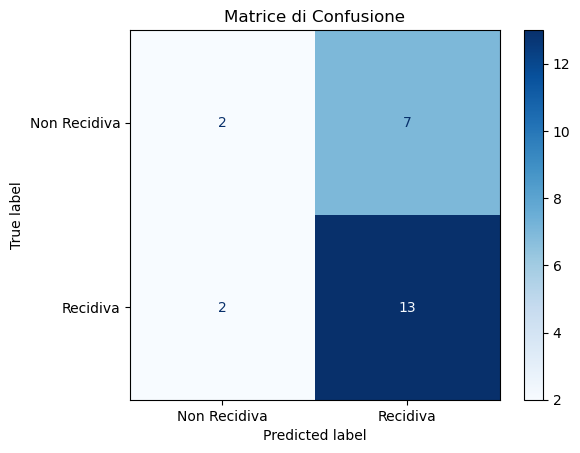

In [95]:
# Visualizzazione alternativa della matrice di confusione
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=['Non Recidiva', 'Recidiva'])
disp.plot(cmap='Blues')
plt.title('Matrice di Confusione')
plt.show()

In [96]:
# Griglia di parametri per ottimizzare il modello
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001, 'scale'],
    'svc__kernel': ['rbf', 'linear', 'poly']
}

In [97]:
# Cerca, tra tutte le possibili combinazioni dei parametri, quelli migliori
grid_search = GridSearchCV(svc_pipeline, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ..........svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   0.0s
[CV] END ..........svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   0.0s
[CV] END ..........svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   0.0s
[CV] END ..........svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   0.0s
[CV] END ..........svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   0.0s
[CV] END .......svc__C=0.1, svc__gamma=1, svc__kernel=linear; total time=   0.0s
[CV] END .......svc__C=0.1, svc__gamma=1, svc__kernel=linear; total time=   0.0s
[CV] END .......svc__C=0.1, svc__gamma=1, svc__kernel=linear; total time=   0.0s
[CV] END .......svc__C=0.1, svc__gamma=1, svc__kernel=linear; total time=   0.0s
[CV] END .......svc__C=0.1, svc__gamma=1, svc__kernel=linear; total time=   0.0s
[CV] END .........svc__C=0.1, svc__gamma=1, svc__kernel=poly; total time=   0.0s
[CV] END .........svc__C=0.1, svc__gamma=1, svc

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(random_state=42))]),
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': [1, 0.1, 0.01, 0.001, 'scale'],
                         'svc__kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy', verbose=2)

In [98]:
# Predizioni sul set di test con il miglior modello trovato
grid_predictions = grid_search.best_estimator_.predict(X_test)

In [99]:
pd.DataFrame(confusion_matrix(y_test, grid_predictions),
             index=pred_classes, columns=real_classes)

,pred_0,pred_1
real_0,6,3
real_1,4,11


In [100]:
# Calcolo della matrice di confusione per il modello ottimizzato
CM = confusion_matrix(y_test, grid_predictions)

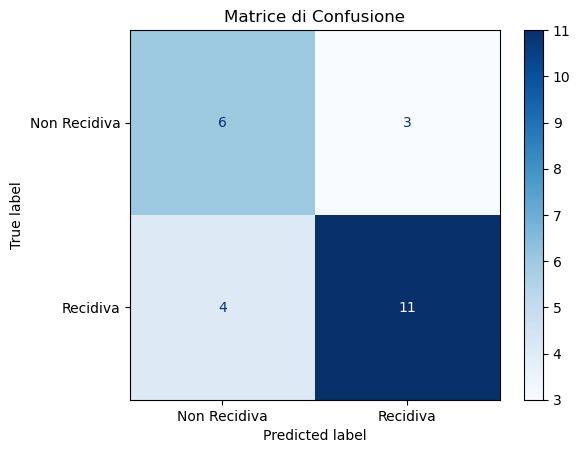

In [101]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=['Non Recidiva', 'Recidiva'])
disp.plot(cmap='Blues')
plt.title('Matrice di Confusione')
plt.show()

In [102]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.79      0.73      0.76        15

    accuracy                           0.71        24
   macro avg       0.69      0.70      0.70        24
weighted avg       0.72      0.71      0.71        24



In [103]:
print("Distribuzione delle classi nel training set:")
print(y_train.value_counts())
print("\nDistribuzione delle classi nel test set:")
print(y_test.value_counts())


Distribuzione delle classi nel training set:
1    30
0    25
Name: Recidiva/Non_Recidiva, dtype: int64

Distribuzione delle classi nel test set:
1    15
0     9
Name: Recidiva/Non_Recidiva, dtype: int64


In [104]:
# Calcolo delle metriche di validazione per il modello con parametri standard
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("\nMetriche sul Test Set:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Metriche sul Test Set:
Accuracy: 0.62
Precision: 0.65
Recall: 0.87
F1-Score: 0.74


In [105]:
# Calcolo delle metriche di validazione per il modello ottimizzato
accuracy = accuracy_score(y_test, grid_predictions)
precision = precision_score(y_test, grid_predictions)
recall = recall_score(y_test, grid_predictions)
f1 = f1_score(y_test, grid_predictions)

print("\nMetriche sul Test Set:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Metriche sul Test Set:
Accuracy: 0.71
Precision: 0.79
Recall: 0.73
F1-Score: 0.76


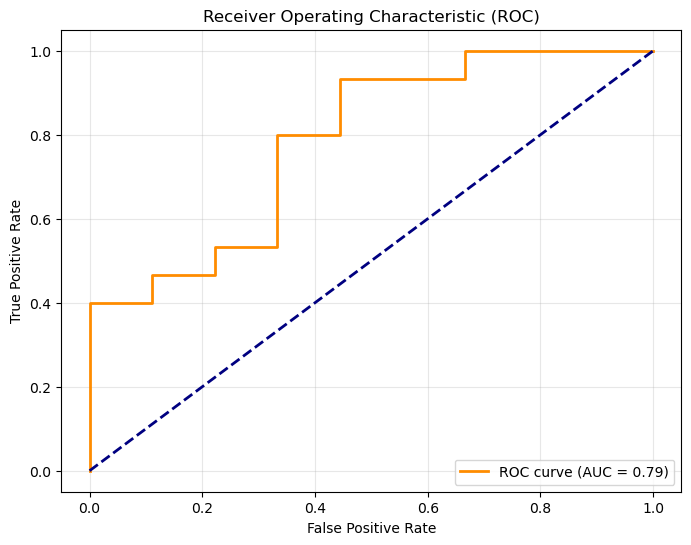

In [106]:
# Controlla se il modello ottimizzato da GridSearchCV supporta il metodo decision_function
if hasattr(grid_search, "decision_function"):
    # Se supportato, calcola i punteggi di confidenza per le predizioni su X_test
    y_prob = grid_search.decision_function(X_test)

# Calcola i falsi positivi, i veri positivi e le soglie per tracciare la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Calcola l'area sotto la curva ROC per valutare le prestazioni del modello
roc_auc = roc_auc_score(y_test, y_prob)

# Plot della curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [107]:
# Funzione per testare tutti i dati nel test set
def test_full_test_set():
    
    # Predizioni sul set di test
    predictions = grid_search.predict(X_test)

    # Calcola il numero di previsioni corrette confrontando i valori reali con quelli predetti
    correct_predictions = (y_test == predictions).sum()
    # Determina il totale delle previsioni
    total_predictions = len(y_test)
    # Calcola l'accuratezza
    accuracy_on_test = correct_predictions / total_predictions


    # Stampa i risultati delle previsioni per ogni esempio nel dataset di test
    print("\nRisultati sui dati del Test Set:")
    # Itera attraverso le previsioni
    for i, pred in enumerate(predictions):
        # Per ogni esempio mostra la classe predetta
        print(f"Esempio {i+1}: {'Recidiva' if pred == 1 else 'Non Recidiva'} "
              # e il valore reale corrispondente per confrontare il modello con i dati reali
              f"(Reale: {'Recidiva' if y_test.iloc[i] == 1 else 'Non Recidiva'})")

    print(f"\nNumero di predizioni corrette: {correct_predictions}")
    print(f"Totale predizioni: {total_predictions}")
    print(f"Accuracy sul Test Set: {accuracy_on_test:.2f}")

In [108]:
test_full_test_set()


Risultati sui dati del Test Set:
Esempio 1: Recidiva (Reale: Recidiva)
Esempio 2: Non Recidiva (Reale: Non Recidiva)
Esempio 3: Recidiva (Reale: Recidiva)
Esempio 4: Non Recidiva (Reale: Recidiva)
Esempio 5: Recidiva (Reale: Recidiva)
Esempio 6: Non Recidiva (Reale: Recidiva)
Esempio 7: Non Recidiva (Reale: Non Recidiva)
Esempio 8: Recidiva (Reale: Recidiva)
Esempio 9: Recidiva (Reale: Non Recidiva)
Esempio 10: Recidiva (Reale: Recidiva)
Esempio 11: Recidiva (Reale: Non Recidiva)
Esempio 12: Non Recidiva (Reale: Non Recidiva)
Esempio 13: Recidiva (Reale: Recidiva)
Esempio 14: Recidiva (Reale: Recidiva)
Esempio 15: Non Recidiva (Reale: Recidiva)
Esempio 16: Recidiva (Reale: Recidiva)
Esempio 17: Non Recidiva (Reale: Non Recidiva)
Esempio 18: Non Recidiva (Reale: Non Recidiva)
Esempio 19: Non Recidiva (Reale: Non Recidiva)
Esempio 20: Non Recidiva (Reale: Recidiva)
Esempio 21: Recidiva (Reale: Recidiva)
Esempio 22: Recidiva (Reale: Non Recidiva)
Esempio 23: Recidiva (Reale: Recidiva)
Es